# Introduction to Neural Netwoks and Deep Learning : INNDL_R7_Project2

# The Street View House Numbers (SVHN) Dataset

### Set up the Environment - Install and load tensorflow

In [0]:
#Check if tensorFlow is already installed

#!pip list

In [2]:
#Make sure we have the latest version tensorflow 2.x installed

!pip install -U tensorflow==2.0 --quiet

     |████████████████████████████████| 86.3MB 35kB/s 
     |████████████████████████████████| 450kB 65.0MB/s 
     |████████████████████████████████| 3.8MB 62.2MB/s 


In [3]:
#Import tensorflow and check version

import tensorflow as tf
tf.__version__

'2.0.0'

In [4]:
#Using executing_eagerly() to execute and evaluate operations immediately, without building graphs

tf.executing_eagerly()

True

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


### Import required Python and Skikitlearn libraries

In [0]:
import pandas as pd
import numpy as np

#Import The h5py package which is a Pythonic interface to the HDF5 binary data format
#h5py files are used to store huge HDF5 binary data format amounts of numerical data, and easily manipulate that data from NumPy.
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

#Set default figure size
plt.rcParams['figure.figsize'] = (16.0, 4.0)

### Problem Statement :
### Given the Street View House Numbers (SVHN) Dataset, implement a simple image classification pipeline based on a deep neural network.

### About the Data:

- **Objective:**

Given the Street View House Numbers (SVHN) Dataset, implement a simple image classification pipeline based on a deep neural network.

- **The Real Problem**

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

- **The Problem of Interest**

Recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

- **Data Description:**

In this project, we will use a dataset with images centered around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.

- **The Street View House Numbers (SVHN) Dataset)**

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

- **Acknowledgment for the datasets.**

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng
Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop
on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

##  Data fetching and understand the train/val/test splits

In [0]:
#Open the h5py file which is stored in HDF5 binary data format using a file handler
#Read the file in 'read' mode

#f = h5py.File("SVHN_single_grey1-2.h5", 'r')
f = h5py.File('/gdrive/My Drive/AIML/INNDL-Project-2_R7/SVHN_single_grey1-2.h5', mode='r')

In [57]:
#Check the file name with the filehandler f

f.filename

'/gdrive/My Drive/AIML/INNDL-Project-2_R7/SVHN_single_grey1-2.h5'

In [58]:
#list all keys, which are the dataset names stored in the h5py file 

list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [59]:
#Check that all the components in the hyp5 file are Datasets

type(f['X_train']), type(f['y_train']), type(f['X_test']), type(f['y_test']), type(f['X_val']), type(f['y_val'])

(h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset,
 h5py._hl.dataset.Dataset)

In [0]:
#Convert all the datasets to numpy arrays

X_train = np.array(f.get('X_train'))
y_train = np.array(f.get('y_train'))
X_test = np.array(f.get('X_test'))
y_test = np.array(f.get('y_test'))
X_val = np.array(f.get('X_val'))
y_val = np.array(f.get('y_val'))

In [61]:
#Check the shape of the training, test and validation datasets

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((42000, 32, 32),
 (18000, 32, 32),
 (42000,),
 (18000,),
 (60000, 32, 32),
 (60000,))

In [62]:
#Check the type of the training, test and validation datasets

type(X_train), type(X_test), type(y_train), type(y_test), type(X_val), type(y_val)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [63]:
#Check the datatype of the training, test and validation datasets

X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype, X_val.dtype, y_val.dtype

(dtype('<f4'),
 dtype('<f4'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('<f4'),
 dtype('uint8'))

In [64]:
#Check unique classes in y_train, ytest and y_val datasets

print('Classes in Training-set: ',np.unique(y_train))
print('\nClasses in Test-set: ',np.unique(y_test))
print('\nClasses in Validation-set: ',np.unique(y_val))

Classes in Training-set:  [0 1 2 3 4 5 6 7 8 9]

Classes in Test-set:  [0 1 2 3 4 5 6 7 8 9]

Classes in Validation-set:  [0 1 2 3 4 5 6 7 8 9]


In [0]:
#Close the filehandler which was opened to read the h5py file

f.close()

### Visualize random images in Training and Test sets

In [0]:
def plot_image(img, labels, nrows, ncols):
  fig, axes = plt.subplots( nrows, ncols)
  for i, ax in enumerate(axes.flat):
    if(img[i].shape == (32,32)):
      #print(img[i].shape)
      ax.imshow(img[i])
    else:
      #print(img[i,:,:,0].shape)
      ax.imshow(img[i,:,:,0])
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(labels[i])

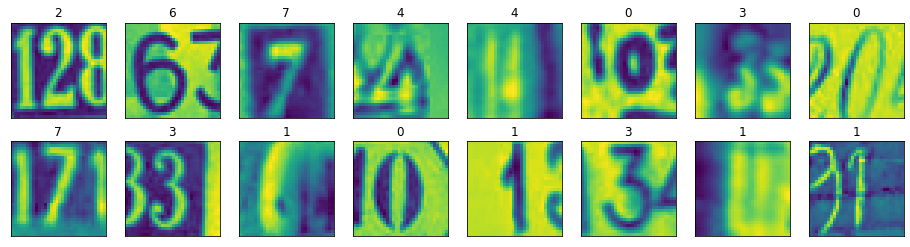

In [18]:
#Plot some random training set images
plot_image(X_train,y_train,2,8)

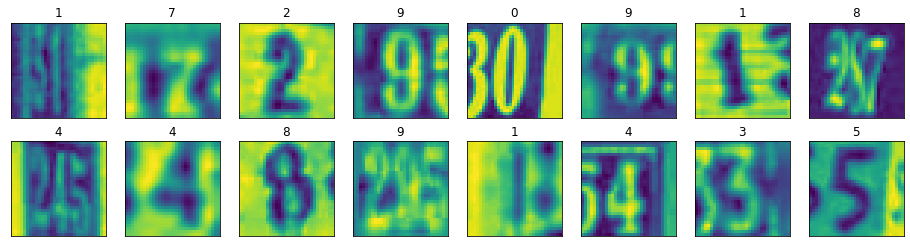

In [19]:
#Plot some random test set images
plot_image(X_test,y_test,2,8)

## Build a Deep Neural Networks Classification Model using Keras

In [20]:
#Initialize the no of classes, batch_size and no of epochs for the model

num_classes = 10
batch_size = 128
epochs = 20
print("No of classes: {}\nbatch_size: {}\nNo of epochs: {}".format(num_classes, batch_size, epochs))

No of classes: 10
batch_size: 128
No of epochs: 20


In [0]:
#Convert the datatype of the training, test and validation datasets to float32

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')

### One-hot encoding of labels to convert them into binary data of 0's and 1's

In [0]:
#Convert to binary data by One-hot encoding using to_categorical

y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val_enc = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

## Build a Neural Network Classification Model using Keras API in TensorFlow

### Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)
### Implement batch normalization for training the neural network
### Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross-entropy loss, cost functions)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [0]:
#Add input layer and Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape(target_shape=(1024,), input_shape=(32,32,)))

#Inplementing BatchNormalization
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Adding First Hidden layer with 300 neurons and activation function 'relu'
model.add(tf.keras.layers.Dense(300, activation='relu'))

#Adding Second Hidden Layer with 200 neurons and activation function 'relu'
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Adding dropout layer with 20% dropout
model.add(tf.keras.layers.Dropout(0.20))

#Add Output layer with 10 classes as the output and apply softmax to predict probabilities
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [0]:
#Compile the model with a cross entropy loss function and sgd optimizer and accuracy as metrics
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 300)               307500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 373,806
Trainable params: 371,758
Non-trainable params: 2,048
______________________________________________

In [28]:
#Fit the model on X_train,Y_train and validate using X_test,Y_test for 20 epochs for batch size of 128
history_model = model.fit(X_train, y_train_enc, batch_size=batch_size,
        validation_data=(X_test, y_test_enc),
        epochs=epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 99us/sample - loss: 2.1352 - accuracy: 0.2540 - val_loss: 1.8017 - val_accuracy: 0.4406
Epoch 2/20
42000/42000 [==============================] - 4s 97us/sample - loss: 1.6469 - accuracy: 0.4733 - val_loss: 1.4296 - val_accuracy: 0.5804
Epoch 3/20
42000/42000 [==============================] - 4s 88us/sample - loss: 1.3541 - accuracy: 0.5817 - val_loss: 1.1927 - val_accuracy: 0.6541
Epoch 4/20
42000/42000 [==============================] - 3s 81us/sample - loss: 1.1902 - accuracy: 0.6341 - val_loss: 1.0809 - val_accuracy: 0.6838
Epoch 5/20
42000/42000 [==============================] - 4s 84us/sample - loss: 1.0907 - accuracy: 0.6666 - val_loss: 1.0265 - val_accuracy: 0.6944
Epoch 6/20
42000/42000 [==============================] - 3s 78us/sample - loss: 1.0101 - accuracy: 0.6948 - val_loss: 0.9803 - val_accuracy: 0.7069
Epoch 7/20
42000/42000 [==============================] 

#### Inference:
- By adding two hidden layers with 300 and 200 neurons in each and activation function as 'RELU' in the hidden layers,and output layer with softmax function for predicting the probabilities, optimizer as SGD with default learning rate of 0.01, the model is giving an accuracy of approximately 81% for both training and validation sets
- The loss is minimized to 0.6 after training for 20 epochs
- The model is performing well without any overfit

In [0]:
#get the weights for model
model_weights = model.get_weights()

In [55]:
model_weights[0:3]

[array([0.98743594, 0.99451894, 0.9884564 , ..., 1.0000688 , 0.9945291 ,
        1.002925  ], dtype=float32),
 array([-0.00885268, -0.01047422,  0.01179394, ..., -0.00331628,
         0.00607079, -0.00263288], dtype=float32),
 array([114.79867 , 114.899956, 115.03327 , ..., 114.26978 , 114.3194  ,
        114.379234], dtype=float32)]

### Evaluate the model on Training and Test datasets

In [30]:
#Evaluate the model's loss and accuracy on Training-set

score_train = model.evaluate(X_train, y_train_enc, verbose=0)
print("The loss using train data is: ",round(score_train[0],3))
print("The accuracy of train data is: ",round(score_train[1],3))

The loss using train data is:  0.523
The accuracy of train data is:  0.851


In [31]:
#Evaluate the model's loss and accuracy on Test-set

score_test = model.evaluate(X_test, y_test_enc, verbose=0)
print("The loss using test data is: ",round(score_test[0],3))
print("The accuracy of test data is: ",round(score_test[1],3))

The loss using test data is:  0.642
The accuracy of test data is:  0.818


### Model Performance : Plot loss and accuracy over no of epochs

In [0]:
def plot_metrics(ax, fontsize, col1, col2, x_label, y_label, title):
    ax.plot((history_model.history[col1]))
    ax.plot((history_model.history[col2]))
    #ax.locator_params(nbins=3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(['Training-data', 'Test-data'])
    ax.set_title(title)

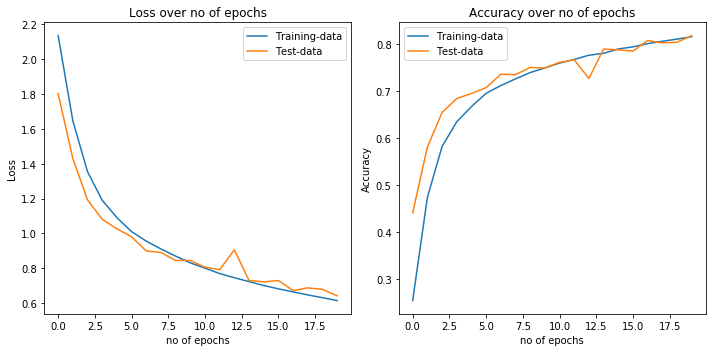

In [33]:
plt.close('all')
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plot_metrics(ax1, 30, 'loss', 'val_loss', 'no of epochs', 'Loss', 'Loss over no of epochs')
plot_metrics(ax2, 30, 'accuracy', 'val_accuracy', 'no of epochs', 'Accuracy', 'Accuracy over no of epochs')
plt.tight_layout()
plt.show()

#### Observations:
- loss over 20 epochs is reducing continuously at a constant pace for the training dataset.The smooth curve which shows constant decrease without any peaks or lows indicates this.
- loss over the epochs for test dataset is reducing constantly till 7 epochs but has peaks and lows after that and nearing the loss obtained by training for 20 epochs
- From the plot of loss, we can see that as the curves for training and test are very close to each other the model has comparable performance on both train and test datasets
- From the plot of accuracy we observe that the model is not an overfit over the training dataset, and the model is showing comparable performance on both datasets.
- The model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs.

### Predict the classes using above model on Test dataset

In [0]:
#Predict the Probabilities and Classes on Test-set
y_predict_test = model.predict(X_test)
y_predict_test_classes = model.predict_classes(X_test)

In [35]:
#Predicted Probabilities on Test-set
#pick any few indices
y_predict_test[870:920]

array([[1.20330542e-01, 2.79707182e-02, 2.88406707e-04, 1.33717735e-03,
        6.59782114e-03, 1.48353623e-02, 8.00564647e-01, 1.24241915e-02,
        1.48592265e-02, 7.91898696e-04],
       [2.67792065e-02, 1.21236509e-02, 2.09958889e-02, 3.86140019e-01,
        1.21327471e-02, 1.10021979e-02, 3.25924233e-02, 4.84775871e-01,
        1.21755153e-02, 1.28240255e-03],
       [5.08701615e-02, 3.80090088e-01, 1.89256072e-02, 6.54808944e-03,
        3.76974791e-01, 4.74530505e-03, 1.93437114e-02, 5.93992025e-02,
        9.83123202e-03, 7.32718334e-02],
       [1.38682559e-01, 3.89469229e-02, 2.66717464e-01, 2.27708444e-01,
        3.68358791e-02, 9.12818406e-03, 4.73291837e-02, 6.16813302e-02,
        1.10305354e-01, 6.26646653e-02],
       [1.60760203e-04, 9.65157986e-01, 3.27464496e-03, 1.66478306e-02,
        1.63484167e-03, 1.24320609e-03, 2.48147058e-04, 4.09903703e-03,
        8.00427515e-04, 6.73316373e-03],
       [1.05864078e-01, 7.52405971e-02, 7.69626275e-02, 8.32663402e-02,
   

In [36]:
#Predicted Classes for Test-set
y_predict_test_classes[870:920]

array([6, 7, 1, 2, 1, 9, 5, 3, 1, 6, 9, 8, 9, 9, 3, 1, 0, 3, 7, 5, 0, 5,
       2, 1, 9, 1, 3, 5, 2, 4, 0, 0, 4, 1, 1, 3, 7, 3, 3, 9, 0, 8, 2, 8,
       3, 9, 7, 4, 3, 4])

In [37]:
#Actual Classes for Test-set
np.argmax(y_test_enc[870:920], axis=1)

array([6, 5, 6, 0, 1, 6, 5, 3, 1, 6, 9, 8, 9, 9, 3, 1, 0, 0, 7, 5, 0, 3,
       2, 1, 9, 4, 9, 5, 2, 4, 0, 0, 4, 1, 1, 3, 7, 8, 3, 9, 0, 8, 2, 8,
       3, 9, 7, 4, 3, 4])

### Print the classification accuracy metrics, 
### Confusion Matrix and Classification Report using the built model for Test dataset

In [38]:
#accuracy score on Test dataset
accuracy_score(y_test, y_predict_test_classes)

0.8175

In [39]:
#precision score on Test dataset
precision_score(y_test, y_predict_test_classes, average='weighted')

0.8178182160732247

In [40]:
#recall score on Test dataset
recall_score(y_test, y_predict_test_classes, average='weighted')

0.8175

In [41]:
#f1 score on Test dataset
f1_score(y_test, y_predict_test_classes, average='weighted')

0.8173051686907583

In [42]:
#Confusion Matrix for Test dataset
confusion_matrix(y_test, y_predict_test_classes)

array([[1591,   21,   10,   23,   33,    8,   33,   24,   23,   48],
       [  34, 1558,   25,   51,   55,   10,   21,   41,   17,   16],
       [  18,   43, 1477,   54,   40,   14,    9,   68,   29,   51],
       [  21,   42,   39, 1326,   35,  132,   22,   37,   41,   24],
       [  25,   57,   28,   24, 1544,   15,   39,   14,   22,   44],
       [  21,   21,   15,  112,   17, 1409,   73,   11,   53,   36],
       [  51,   26,   16,   29,   54,   57, 1499,   12,   67,   21],
       [  28,   77,   42,   33,   25,   12,   11, 1540,   13,   27],
       [  32,   44,   31,   65,   35,   39,  113,   13, 1371,   69],
       [  91,   46,   23,   47,   34,   47,   23,   37,   56, 1400]])

In [43]:
#Classification Report for Test dataset
print(classification_report(y_test, y_predict_test_classes))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1814
         1.0       0.81      0.85      0.83      1828
         2.0       0.87      0.82      0.84      1803
         3.0       0.75      0.77      0.76      1719
         4.0       0.82      0.85      0.84      1812
         5.0       0.81      0.80      0.80      1768
         6.0       0.81      0.82      0.82      1832
         7.0       0.86      0.85      0.85      1808
         8.0       0.81      0.76      0.78      1812
         9.0       0.81      0.78      0.79      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



### Predict the classes using above model on Validation datset

In [0]:
#Predict the probability percentages and the classes which were predicted using above model for Validation-set
y_predict_val = model.predict(X_val)
y_predict_val_classes = model.predict_classes(X_val)

In [45]:
#Predicted Probabilities on Validation-set
#pick any few indices
y_predict_val[9720:9770]

array([[8.10591911e-04, 1.90022006e-03, 9.70863342e-01, 2.05725105e-03,
        2.87721748e-04, 3.58465011e-04, 1.06552332e-04, 1.54143460e-02,
        1.28326763e-03, 6.91807689e-03],
       [1.49416912e-04, 4.99889662e-04, 9.85722601e-01, 3.96076497e-03,
        2.36590640e-04, 2.67250325e-05, 1.73659646e-05, 8.79027508e-03,
        4.04139661e-04, 1.92260093e-04],
       [1.72453860e-04, 2.86761089e-03, 9.75425303e-01, 2.23909505e-03,
        1.42986048e-03, 3.06351540e-05, 2.75441889e-05, 1.68445986e-02,
        7.21507065e-04, 2.41344314e-04],
       [6.45745837e-04, 3.76406983e-02, 8.48733604e-01, 4.00940515e-03,
        4.64571756e-04, 8.33306331e-05, 4.60322299e-05, 1.05597138e-01,
        1.91581517e-03, 8.63665540e-04],
       [3.46582546e-03, 3.46983403e-01, 1.54679999e-01, 4.70621474e-02,
        3.18783857e-02, 1.98481958e-02, 6.36449605e-02, 1.18440785e-01,
        2.06658602e-01, 7.33765261e-03],
       [5.72316684e-02, 1.22031115e-01, 1.50975108e-01, 4.14071903e-02,
   

In [46]:
#Predicted Classes on Validation-set

y_predict_val_classes[9720:9770]

array([2, 2, 2, 2, 1, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2])

In [47]:
#Actual classes from y_val on Validation-set
np.argmax(y_val_enc[9720:9770], axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

### Print the classification accuracy metrics, Confusion Matrix and Classification Report using the built model for Validation dataset

In [48]:
#accuracy score on Validation dataset
accuracy_score(y_val, y_predict_val_classes)

0.8409833333333333

In [49]:
#precision-score on Validation dataset
precision_score(y_val, y_predict_val_classes, average='weighted')

0.8412035589254007

In [50]:
#recall-score on Validation dataset
recall_score(y_val, y_predict_val_classes, average='weighted')

0.8409833333333333

In [51]:
#f1_score on Validation dataset
f1_score(y_val, y_predict_val_classes, average='weighted')

0.8407938814479567

In [52]:
#Confusion Matrix for Validation dataset
confusion_matrix(y_val, y_predict_val_classes)

array([[5322,   89,   40,   46,   91,   29,  123,   56,   72,  132],
       [  99, 5220,   62,  138,  135,   21,   50,  154,   65,   56],
       [  43,  129, 5110,  135,  115,   35,   42,  200,   78,  113],
       [  58,  155,  112, 4786,   96,  375,   59,  123,  133,  103],
       [  97,  189,   78,   58, 5215,   48,   96,   29,   71,  119],
       [  59,   71,   42,  332,   78, 4926,  239,   33,  128,   92],
       [ 157,   80,   46,   79,  170,  169, 4993,   35,  205,   66],
       [  60,  212,  126,   83,   64,   36,   31, 5292,   33,   63],
       [ 115,  140,   76,  176,  132,  131,  324,   40, 4692,  174],
       [ 245,  135,   88,  132,   96,  112,   63,   80,  146, 4903]])

In [53]:
#Classification Report for Validation dataset
print(classification_report(y_val, y_predict_val_classes))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      6000
         1.0       0.81      0.87      0.84      6000
         2.0       0.88      0.85      0.87      6000
         3.0       0.80      0.80      0.80      6000
         4.0       0.84      0.87      0.86      6000
         5.0       0.84      0.82      0.83      6000
         6.0       0.83      0.83      0.83      6000
         7.0       0.88      0.88      0.88      6000
         8.0       0.83      0.78      0.81      6000
         9.0       0.84      0.82      0.83      6000

    accuracy                           0.84     60000
   macro avg       0.84      0.84      0.84     60000
weighted avg       0.84      0.84      0.84     60000



### Inference:
- The accuracy score on test dataset is 82% and the precision, recall and f1 scores are 82%
- The accuracy score on Validation dataset  is 84% and the precision, recall and f1 scores are all 84%
- The model is performing comapritively well on both test and validation datasets